# Stock Price Predicition
  (For netflix stock prices from 2018-2022)

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Preparing Dataframe

In [3]:
# Loading and viewing Dataset
netflix_df = pd.read_csv('NFLX.csv')
print("Printing last 5 rows of Elevator Dataset")
netflix_df.tail(5) 

Printing last 5 rows of Elevator Dataset


,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


### Exploring the Data

In [4]:
# Getting the column names for the dataset
print(netflix_df.columns.to_list(), len(netflix_df.columns.to_list()))

# Searching for missing dates
missing_dates = netflix_df['Date'].isnull()

# Finding the total amount of missing dates
total_missing_dates = missing_dates.sum()
print("Total missing dates: ", total_missing_dates) # None found

# Convert Date column to a date
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'])

# Printing Columns
print("Type of date column: ", netflix_df['Date'].dtype)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] 7
Total missing dates:  0
Type of date column:  datetime64[ns]


In [5]:
# Getting the average 'High' per month
avg_high = netflix_df.groupby(netflix_df['Date'].dt.month)['High'].mean()
avg_high.head(12) # 12 months

Date
1     423.948765
2     398.389358
3     395.330574
4     408.427382
5     407.189168
6     427.926234
7     445.814534
8     423.055907
9     443.464692
10    445.397190
11    443.788169
12    439.696427
Name: High, dtype: float64

In [6]:
# Checking for missing values
missing_values = netflix_df.isna()
print(missing_values.sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
# Printing off Column Names
print(netflix_df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [8]:
# Getting averages for all of the numerical data in the dataframe
netflix_df.describe(include='number')

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


### Visualizing data

In [9]:
# Getting the average price per day to use on our plot
netflix_df['average'] = netflix_df[['High', 'Low', 'Close']].mean(axis=1)

# Confirming 'average' column has been added
netflix_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,average
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,257.396663
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,259.140004
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,267.113332
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,255.906667
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,247.126668


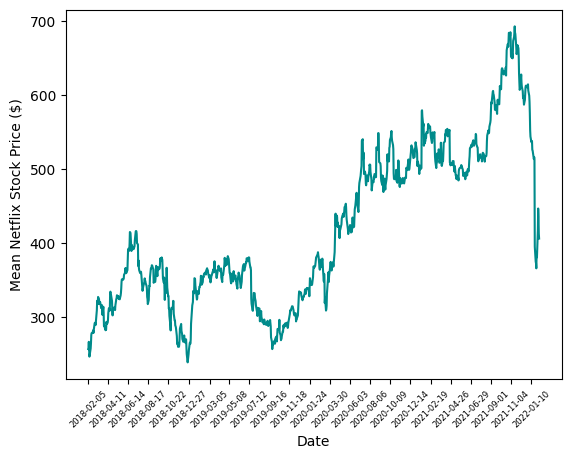

In [10]:
# Creating a line chart
plt.plot(netflix_df['Date'], netflix_df['average'], linestyle='-', color='darkcyan')
plt.xlabel('Date')
plt.ylabel('Mean Netflix Stock Price ($)')

# Changing tick value for our x axis
custom_tick = netflix_df['Date'][::45]

plt.xticks(custom_tick, rotation=45, fontsize=6)

plt.show()

In [11]:
# Importing another plotting library
import mplfinance as mpl

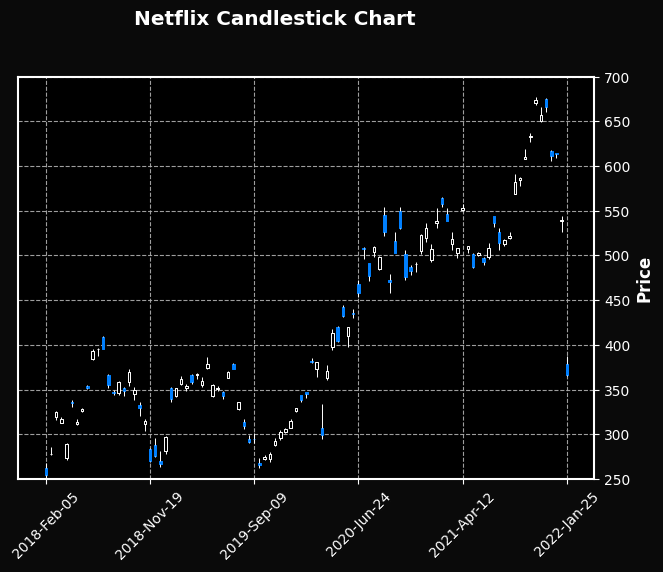

In [12]:
# Creating a candlestick chart
netflix_dfi = netflix_df.set_index("Date", inplace=False) # Using 'Date' column for our index

# Date range in df '2018-02-05'-'2022-02-04'
# PLotting Every 10 days to not overcrowd out plot
sample_netflix_dfi = netflix_dfi.loc['2018-02-05':'2022-02-04': 10]


# See 'https://github.com/matplotlib/mplfinance/wiki/Mplfinance-Style-Sheets-Reference'
# for all plotting styles
mpl.plot(sample_netflix_dfi[['Open', 'High', 'Low', 'Close']], type='candle', 
         title='Netflix Candlestick Chart', style='mike', ylim=(250, 700))

### Splitting The Dataframe

In [15]:
# To start out, let's use sklearn, and then will try to design
# my own LinearRegression() Model
from sklearn.model_selection import train_test_split # Used to split netflix_df
from sklearn.linear_model import LinearRegression # Only using temporarily

In [19]:
# Printing all variables
print(netflix_df.columns)
netflix_df.head(3)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'average'],
      dtype='object')


,Date,Open,High,Low,Close,Adj Close,Volume,average
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,257.396663
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,259.140004
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,267.113332


In [22]:
# Selecting Features(X) and Target Variable(y)
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close' # Predicting Closing Prices

X = netflix_df[features]
y = netflix_df[target]

# Splitting Into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
# Taking a look at the data to ensure train/test split worked as expected
print("Printing X_train and X_test\n")
print(X_train.head(), "\n")
print(X_test.head(), "\n")

print("Printing y_train and y_test\n")
print(y_train.head(), "\n")
print(y_test.head(), "\n")

Printing X_train and X_test

           Open        High         Low    Volume
254  338.000000  348.000000  338.000000   7561400
644  492.500000  549.039978  492.079987  20373700
408  291.559998  293.809998  283.399994   8461300
819  504.619995  508.549988  501.119995   3132800
522  377.769989  384.010010  370.510010   5487300 

           Open        High         Low    Volume
628  498.649994  510.440002  498.649994   5608000
631  505.450012  508.290009  486.679993   5910300
741  507.350006  514.500000  499.579987   4177400
514  385.329987  387.320007  377.899994   3930100
365  323.399994  325.850006  314.230011  16302500 

Printing y_train and y_test

254    347.570007
644    547.530029
408    286.600006
819    503.839996
522    383.790009
Name: Close, dtype: float64 

628    509.640015
631    494.730011
741    500.859985
514    380.070007
365    315.100006
Name: Close, dtype: float64 



### TODO:
- Study and understand how the sckit-learn linear regression model works.
- Implement the sckit-learn model to better understand how applying the algorithms works
- Start to research developing your own iteration of the LinearRegression() model to see if you can improve the accuracy.
- Don't give up!! You're closer than you believe!